## Data Viz Bacterial motor

In [1]:
import os
import random
from glob import glob
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from bacterial_motor.BYU_Locating-Bacterial_Flagellar_Motors_2025.pictures import test

In [2]:
# processed_images = '/Users/wm/code/mc-will/bacterial_motor/BYU_Locating-Bacterial_Flagellar_Motors_2025/pictures/pictures-wagon1992-group-project/processed_images'
image_train = '/Users/wm/code/mc-will/bacterial_motor/BYU_Locating-Bacterial_Flagellar_Motors_2025/data/pictures_raw/train'
# image_test = '/Users/wm/code/mc-will/bacterial_motor/BYU_Locating-Bacterial_Flagellar_Motors_2025/pictures/pictures-wagon1992-group-project/test'
sample_submission_csv = '/Users/wm/code/mc-will/bacterial_motor/BYU_Locating-Bacterial_Flagellar_Motors_2025/data/sample_submission.csv'
train_label_csv= '/Users/wm/code/mc-will/bacterial_motor/BYU_Locating-Bacterial_Flagellar_Motors_2025/data/train_labels.csv'


## Check de CSV's

### Check Train Label csv

In [3]:
# data frame de train_laber.csv
df_sample_submission = pd.read_csv(sample_submission_csv)
df_train_label_csv = pd.read_csv (train_label_csv)
df_sample_submission

,tomo_id,Motor axis 0,Motor axis 1,Motor axis 2
0,tomo_003acc,100,100,100
1,tomo_00e047,100,100,100
2,tomo_01a877,100,100,100


In [4]:
df_train_label_csv

,row_id,tomo_id,Motor axis 0,Motor axis 1,Motor axis 2,Array shape (axis 0),Array shape (axis 1),Array shape (axis 2),Voxel spacing,Number of motors
0,0,tomo_003acc,-1.0,-1.0,-1.0,500,1912,1847,6.5,0
1,1,tomo_00e047,169.0,546.0,603.0,300,959,928,15.6,1
2,2,tomo_00e463,235.0,403.0,137.0,500,924,956,19.7,6
3,3,tomo_00e463,243.0,363.0,153.0,500,924,956,19.7,6
4,4,tomo_00e463,222.0,379.0,144.0,500,924,956,19.7,6
...,...,...,...,...,...,...,...,...,...,...
732,732,tomo_fe050c,138.0,134.0,542.0,300,959,928,15.6,1
733,733,tomo_fe85f6,-1.0,-1.0,-1.0,800,928,960,13.1,0
734,734,tomo_fea6e8,-1.0,-1.0,-1.0,300,960,928,16.8,0
735,735,tomo_ff505c,111.0,816.0,678.0,300,959,928,15.6,1


In [5]:
number_tomos = df_train_label_csv['tomo_id'].value_counts()
print(f'Number of tomographies by group: {number_tomos}') ##648
df_train_label_csv.describe()

Number of tomographies by group: tomo_id
tomo_226cd8    10
tomo_00e463     6
tomo_9a7701     6
tomo_d662b0     6
tomo_da79d8     4
               ..
tomo_57c814     1
tomo_5984bf     1
tomo_59b470     1
tomo_5b087f     1
tomo_ff7c20     1
Name: count, Length: 648, dtype: int64


,row_id,Motor axis 0,Motor axis 1,Motor axis 2,Array shape (axis 0),Array shape (axis 1),Array shape (axis 2),Voxel spacing,Number of motors
count,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000
mean,368.000000,101.861601,294.853460,300.818182,422.651289,950.207598,954.819539,15.341655,1.127544
std,212.897863,102.208293,282.325485,293.368799,174.341523,64.861948,97.229970,2.398197,1.642676
min,0.000000,-1.000000,-1.000000,-1.000000,300.000000,924.000000,924.000000,6.500000,0.000000
25%,184.000000,-1.000000,-1.000000,-1.000000,300.000000,928.000000,928.000000,13.100000,0.000000
50%,368.000000,106.000000,278.000000,280.000000,300.000000,959.000000,928.000000,15.600000,1.000000
75%,552.000000,170.000000,549.000000,567.000000,500.000000,960.000000,956.000000,16.800000,1.000000
max,736.000000,466.000000,904.000000,902.000000,800.000000,1912.000000,1847.000000,19.700000,10.000000


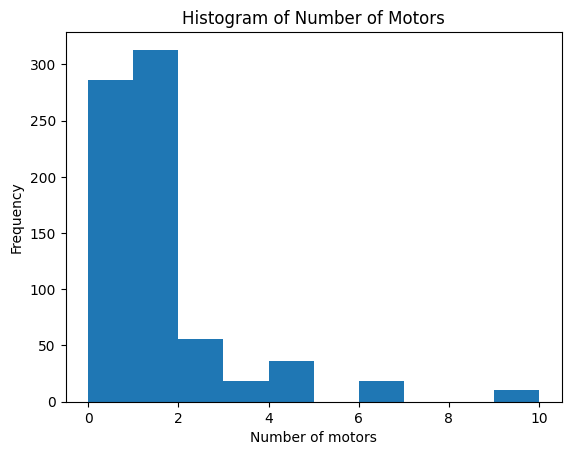

In [6]:
plt.hist(df_train_label_csv['Number of motors'])
plt.xlabel('Number of motors')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Motors');

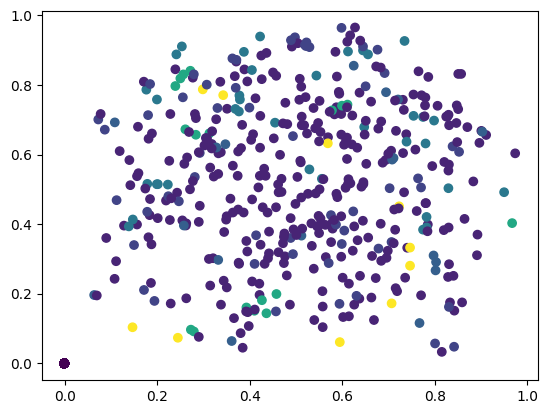

In [7]:
## Motor Position en funcion / scaled

df_train_label_csv['Motor_1_Normal'] =df_train_label_csv['Motor axis 1']/df_train_label_csv['Array shape (axis 1)']
df_train_label_csv['Motor_2_Normal'] =df_train_label_csv['Motor axis 2']/df_train_label_csv['Array shape (axis 2)']
plt.scatter(df_train_label_csv['Motor_1_Normal'], df_train_label_csv['Motor_2_Normal'], c=df_train_label_csv['Number of motors'])

Found 300 images in '/Users/wm/code/mc-will/bacterial_motor/BYU_Locating-Bacterial_Flagellar_Motors_2025/data/pictures_raw/test/tomo_00e047'.

Displaying 3 random images:


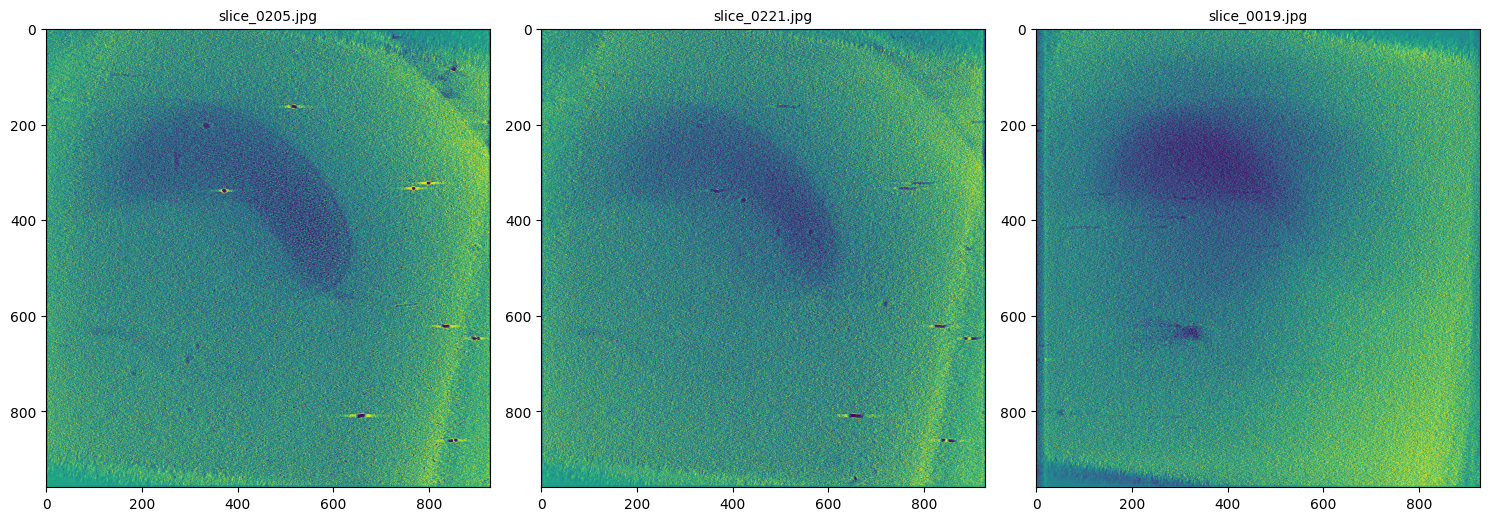

In [8]:

specific_image_dir = "/Users/wm/code/mc-will/bacterial_motor/BYU_Locating-Bacterial_Flagellar_Motors_2025/data/pictures_raw/test/tomo_00e047"

# Find all .jpg files directly in this specific directory
# The pattern '*.jpg' means any files ending with .jpg in the current directory
image_paths = glob(os.path.join(specific_image_dir, '*.jpg'))

print(f"Found {len(image_paths)} images in '{specific_image_dir}'.")

if len(image_paths) == 0:
    print(f"No .jpg images found in the directory: {specific_image_dir}")


else:
    # Randomly select 3 unique image paths
    num_images_to_display = 3
    selected_image_paths = random.sample(image_paths, num_images_to_display)
    print(f"\nDisplaying {num_images_to_display} random images:")

# Display the selected images
if selected_image_paths:
    plt.figure(figsize=(15, 5)) # Adjust figure size as needed
    for i, img_path in enumerate(selected_image_paths):
        img = Image.open(img_path)
        plt.subplot(1, num_images_to_display, i + 1) # Create a subplot for each image
        plt.imshow(img)
        plt.title(os.path.basename(img_path), fontsize=10)


    plt.tight_layout()
    plt.show()

In [9]:
mean_voxel = df_train_label_csv['Voxel spacing'].mean()
min_voxel = df_train_label_csv['Voxel spacing'].min()
max_voxel = df_train_label_csv['Voxel spacing'].max()
print (f'Voxel average :{mean_voxel} , min: {min_voxel} , max: {max_voxel}')

Voxel average :15.341655359565806 , min: 6.5 , max: 19.7



Displaying 4 random images:


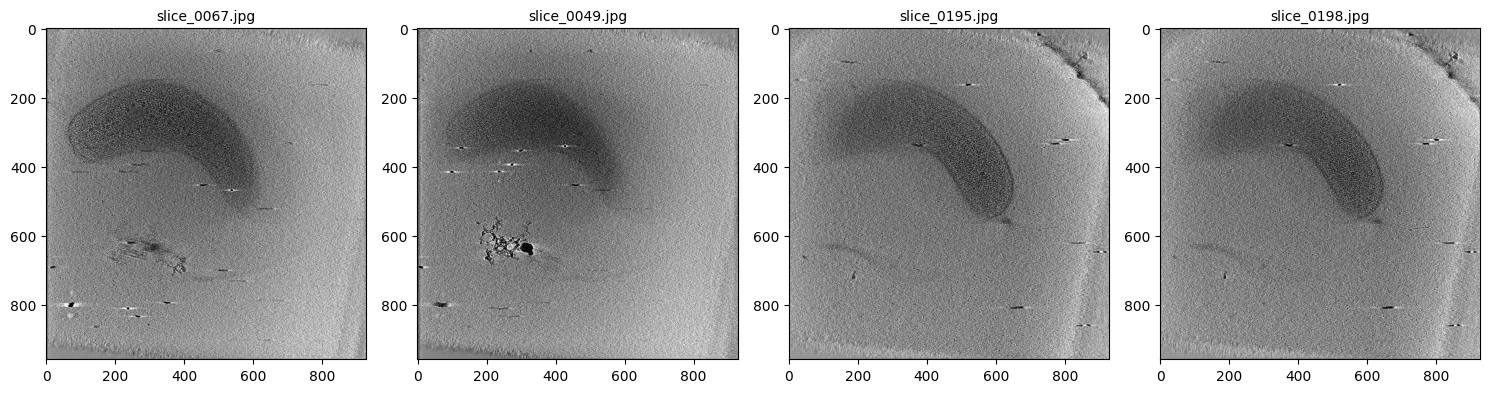

In [10]:
specific_image_dir = "/Users/wm/code/mc-will/bacterial_motor/BYU_Locating-Bacterial_Flagellar_Motors_2025/data/pictures_raw/test/tomo_00e047"

image_paths = glob(os.path.join(specific_image_dir, '*.jpg'))

def image_viz(image_paths,num_images_to_display = 3):

    if len(image_paths) == 0:
        print(f"No .jpg images found in the directory: {specific_image_dir}")

    else:
        selected_image_paths = random.sample(image_paths, num_images_to_display)
        print(f"\nDisplaying {num_images_to_display} random images:")

    # Display the selected images
    if selected_image_paths:
        plt.figure(figsize=(15, 5)) # Adjust figure size as needed
        for i, img_path in enumerate(selected_image_paths):
            img = Image.open(img_path)
            plt.subplot(1, num_images_to_display, i + 1) # Create a subplot for each image
            plt.imshow(img, cmap='gray')
            plt.title(os.path.basename(img_path), fontsize=10)


        plt.tight_layout()
        plt.show()

image_viz(image_paths, 4)

In [11]:
# /Users/wm/code/mc-will/bacterial_motor/BYU_Locating-Bacterial_Flagellar_Motors_2025/data/pictures_raw/train/tomo_0a8f05
# image_train.

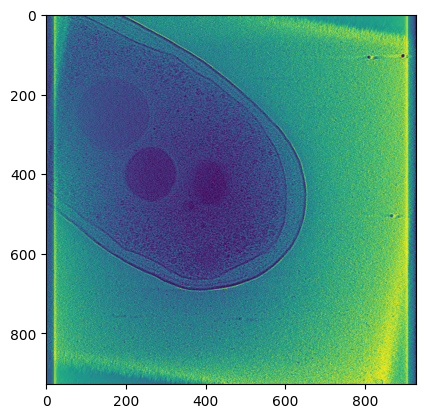

In [12]:
image_dir = '/Users/wm/code/mc-will/bacterial_motor/BYU_Locating-Bacterial_Flagellar_Motors_2025/data/pictures_raw/train/tomo_0a8f05'


input_one_tomo = glob(os.path.join(image_dir, '*.jpg'))
img = Image.open(input_one_tomo[17])
plt.imshow(img);

In [13]:
img_np = np.array(img).copy() ##############
img_np

array([[42, 36, 36, ..., 40, 48,  6],
       [62, 52, 51, ..., 40, 48,  6],
       [43, 37, 41, ..., 40, 48,  6],
       ...,
       [61, 62, 62, ..., 50, 83, 44],
       [61, 62, 62, ..., 49, 65, 53],
       [61, 62, 62, ..., 49, 36, 52]], shape=(928, 928), dtype=uint8)

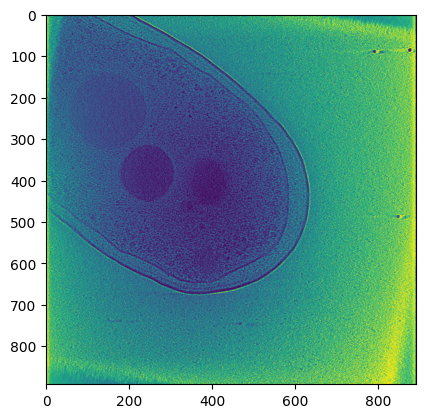

In [14]:
def cut_img (img: np.array, porcetage_cut:int ):
    h, w = img.shape[:2]
    margin_h = int(h * porcetage_cut)
    margin_w = int(w * porcetage_cut)
    cropped = img_np[margin_h:h - margin_h, margin_w:w - margin_w]
    return cropped


plt.imshow(cut_img(img_np, 0.02))


In [15]:
img_cut = cut_img(img_np, 0.02)
## reshape in only 1 column
img_cut.reshape((img_cut.shape[0]*img_cut.shape[1]) ,1)

array([[134],
       [151],
       [157],
       ...,
       [166],
       [124],
       [130]], shape=(795664, 1), dtype=uint8)

In [16]:
# outliner's with > 960 pixels
x= df_train_label_csv[df_train_label_csv['Array shape (axis 2)']>960]
x

,row_id,tomo_id,Motor axis 0,Motor axis 1,Motor axis 2,Array shape (axis 0),Array shape (axis 1),Array shape (axis 2),Voxel spacing,Number of motors,Motor_1_Normal,Motor_2_Normal
0,0,tomo_003acc,-1.0,-1.0,-1.0,500,1912,1847,6.5,0,-0.000523,-0.000541
17,17,tomo_04d42b,-1.0,-1.0,-1.0,500,1024,1440,13.3,0,-0.000977,-0.000694
47,47,tomo_10a3bd,-1.0,-1.0,-1.0,500,1024,1440,13.3,0,-0.000977,-0.000694
176,176,tomo_3a6a9d,-1.0,-1.0,-1.0,500,1024,1440,13.3,0,-0.000977,-0.000694
197,197,tomo_41ea80,-1.0,-1.0,-1.0,500,1024,1440,13.3,0,-0.000977,-0.000694
266,266,tomo_5d01e8,-1.0,-1.0,-1.0,500,1024,1440,13.3,0,-0.000977,-0.000694
328,328,tomo_6e196d,-1.0,-1.0,-1.0,500,1024,1440,13.3,0,-0.000977,-0.000694
353,353,tomo_7a49bd,-1.0,-1.0,-1.0,500,1024,1440,13.3,0,-0.000977,-0.000694
371,371,tomo_8174f5,-1.0,-1.0,-1.0,500,1024,1440,13.3,0,-0.000977,-0.000694
375,375,tomo_8351d1,-1.0,-1.0,-1.0,500,1024,1440,13.3,0,-0.000977,-0.000694


## CNN logistic


Only photos with max 960 in axis X and Y

MSE 

